In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('../Dataset/US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(7728394, 46)

**The dataset is to long we extract a sample from it**

In [7]:
# df = df.sample(n=100000)

# df.to_csv('../Dataset/sample.csv', index=False)
df = pd.read_csv('../Dataset/sample.csv')

In [8]:
df.shape

(100000, 46)

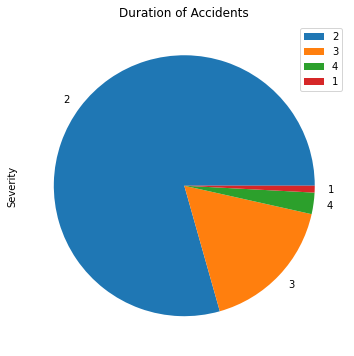

In [9]:
out = df.Severity.value_counts(sort = True)

fig, ax = plt.subplots(1,1, figsize=(6,6))
out.plot.pie(legend=True, ax=ax)
plt.title("Duration of Accidents")
plt.show()

In [10]:
df.shape

(100000, 46)

In [11]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**Analyze the duration of the accidents**

In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration'] = round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

In [13]:
df = df.drop(['ID','Description','End_Lat', 'End_Lng','End_Time','Country',"Weather_Timestamp",'Zipcode','Airport_Code',
              'Timezone','Weather_Condition','Street'], axis=1)

df= df.rename(columns = {'Distance(mi)': 'Distance_mi','Temperature(F)' : 'Temperature_F' ,'Wind_Chill(F)':'Wind_Chill_F',
                         'Humidity(%)' : 'Humidity_percentage' ,'Pressure(in)':'Pressure_in','Visibility(mi)': 'Visibility_mi',
                           'Wind_Speed(mph)': 'Wind_Speed_mph', 'Precipitation(in)': 'Precipitation_in' })
df.shape

(100000, 35)

In [14]:
df.columns

Index(['Source', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Distance_mi', 'City', 'County', 'State', 'Temperature_F',
       'Wind_Chill_F', 'Humidity_percentage', 'Pressure_in', 'Visibility_mi',
       'Wind_Direction', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration'],
      dtype='object')

In [15]:
df['Duration'].describe().astype(int)

count     100000
mean         438
std        13084
min            4
25%           32
50%           75
75%          125
max      1115445
Name: Duration, dtype: int32

In [16]:
df['D'] = ' '
df.loc[(df['Duration'] >= 0) &  (df['Duration'] <= 180), 'D'] = '0-3 h'
df.loc[(df['Duration'] > 180) &  (df['Duration'] <= 360), 'D'] = '3-6h'
df.loc[df['Duration'] > 360, 'D'] = '6+ h'

In [17]:
df ['D'].value_counts()

0-3 h    86040
3-6h     10764
6+ h      3196
Name: D, dtype: int64

In [18]:
print(f'{round(df.D.value_counts()[0]/df.shape[0],2)*100} % of accidents have Duration 0-3 h')
print(f'{round(df.D.value_counts()[1]/df.shape[0],2)*100} % of accidents have Duration 3-6 h')
print(f'{round(df.D.value_counts()[2]/df.shape[0],2)*100} % of accidents have Duration 6+ h')

86.0 % of accidents have Duration 0-3 h
11.0 % of accidents have Duration 3-6 h
3.0 % of accidents have Duration 6+ h


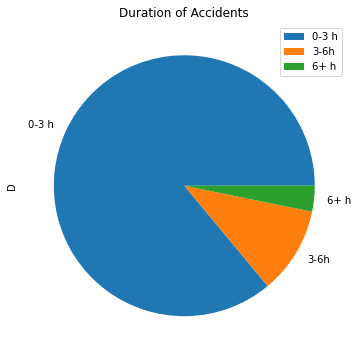

In [19]:
out = df.D.value_counts(sort = True)

fig, ax = plt.subplots(1,1, figsize=(6,6))
out.plot.pie(legend=True, ax=ax)
plt.title("Duration of Accidents")
plt.show()

Text(0, 0.5, 'Latitude')

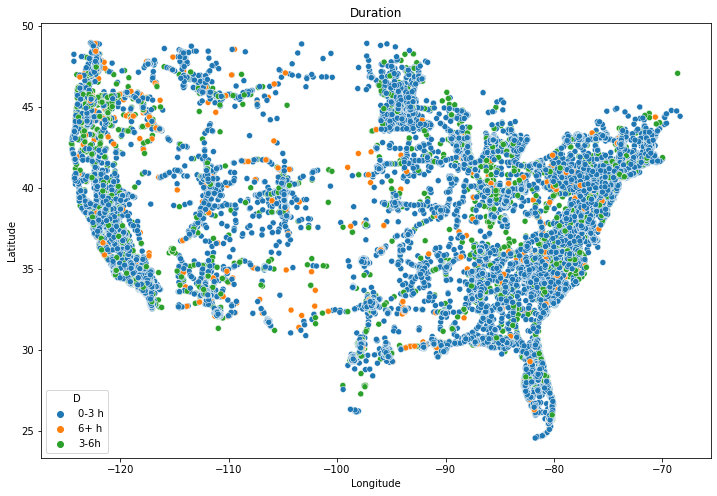

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df.Start_Lat,x=df.Start_Lng,hue=df.D)
plt.title('Duration')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

**Investigate the cities where the accidents occurred**

In [22]:
df.City.value_counts()

Miami               2405
Houston             2240
Los Angeles         1996
Charlotte           1776
Dallas              1686
                    ... 
Lake Panasoffkee       1
Camp Douglas           1
Dallesport             1
Minocqua               1
Westwego               1
Name: City, Length: 6432, dtype: int64

In [23]:
# We indicators
Accidents_per_City = df.City.value_counts()
Cities_with_high_accidents = Accidents_per_City[Accidents_per_City >= 50 ]
Cities_with_low_accidents = Accidents_per_City[Accidents_per_City < 50 ]
Number_of_high_accidents_Cities = len(Cities_with_high_accidents)
Number_of_low_accidents_Cities = len(Cities_with_low_accidents)
Number_of_Cities = len(Accidents_per_City)
Percentage_of_high_accidents_Cities = (round(Number_of_high_accidents_Cities / Number_of_Cities,2))*100
Percentage_of_low_accidents_Cities = (round(Number_of_low_accidents_Cities / Number_of_Cities,2))*100

In [24]:
print(f'Number of high accidents Cities is {Number_of_high_accidents_Cities} from {Number_of_Cities} which are all Cities')
print(f'{Percentage_of_high_accidents_Cities} % of Accidents is more than 50 per city.')
print('')
print(f'Number of low accidents Cities is {Number_of_low_accidents_Cities} from {Number_of_Cities} which are all Cities')
print(f'{Percentage_of_low_accidents_Cities} % of Accidents is less than 50 per city.')

Number of high accidents Cities is 314 from 6432 which are all Cities
5.0 % of Accidents is more than 50 per city.

Number of low accidents Cities is 6118 from 6432 which are all Cities
95.0 % of Accidents is less than 50 per city.


**Analyze the distance of accidents**

In [25]:
df['Distance_mi'].describe()

count    100000.000000
mean          0.572272
std           1.748757
min           0.000000
25%           0.000000
50%           0.029000
75%           0.468250
max          76.000000
Name: Distance_mi, dtype: float64

In [26]:
len(df['Distance_mi'].unique())

6224

In [27]:
df['Distance'] = ' '
df.loc[(df['Distance_mi'] >= 0) &  (df['Distance_mi'] <= 0.5), 'Distance'] = '0-0.50 miles'
df.loc[(df['Distance_mi'] > 0.5) &  (df['Distance_mi'] <= 1), 'Distance'] = '0.50 - 1 miles'
df.loc[df['Distance_mi'] > 1, 'Distance'] = '1+ miles'

In [28]:
print(f'{round(df.Distance.value_counts()[0]/df.shape[0],2)*100} % of accidents have Distance 0-0.5 miles')
print(f'{round(df.Distance.value_counts()[1]/df.shape[0],2)*100} % of accidents have Distance 0.5-1 miles')
print(f'{round(df.Distance.value_counts()[2]/df.shape[0],1)*100} % of accidents have Distance 1+ miles')

76.0 % of accidents have Distance 0-0.5 miles
15.0 % of accidents have Distance 0.5-1 miles
10.0 % of accidents have Distance 1+ miles


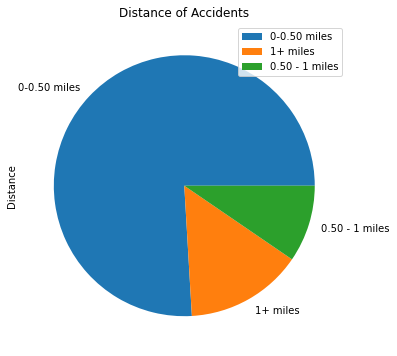

In [29]:
out = df.Distance.value_counts(sort = True)

fig, ax = plt.subplots(1,1, figsize=(6,6))
out.plot.pie(legend=True, ax=ax)
plt.title("Distance of Accidents")
plt.show()

Text(0, 0.5, 'Latitude')

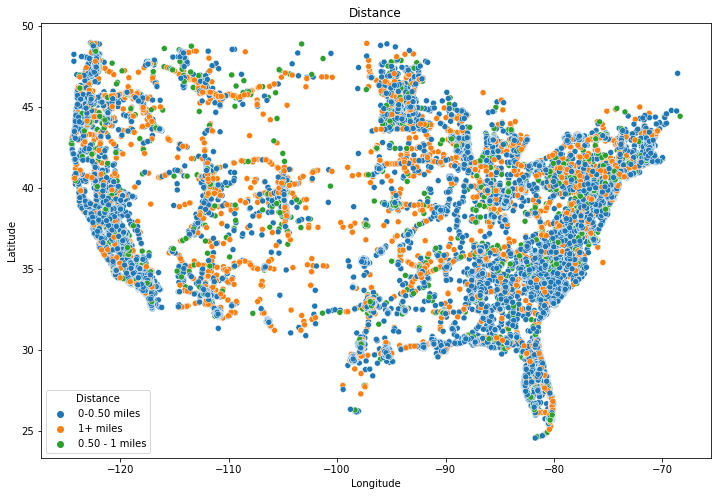

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df.Start_Lat,x=df.Start_Lng,hue=df.Distance)
plt.title('Distance')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

**Explore the temperature variances in USA**

Text(0.5, 1.0, 'Temperature in USA')

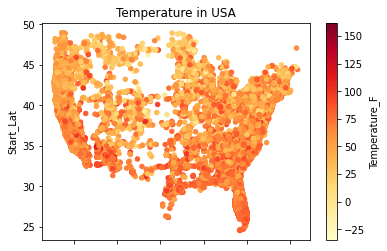

In [40]:
df.plot(x="Start_Lng", y="Start_Lat", kind="scatter", c="Temperature_F",colormap="YlOrRd")
plt.title("Temperature in USA")